# KHAI BÁO SỬ DỤNG THƯ VIỆN

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# LOAD DATA


In [2]:
# Import một số thư viện cần thiết
import pandas as pd


# B1: Load data
# Load data từ link google drive
def load_from_google(url):
  # Lấy id của file
  id = url.split('/')[-2]
  # Tạo link downloads:
  download_url = 'https://drive.google.com/uc?id=' + id
  # Load file từ link downloads
  data = pd.read_csv(download_url)
  return data

# Thay link của data zô đây
train_url = 'https://drive.google.com/file/d/1XQvqilSJNvWRMUptg7zbyZvryZF95gyo/view?usp=sharing'
# Load data train từ link
train = load_from_google(train_url)

In [3]:
# Load data test từ link google drive
test_url = 'https://drive.google.com/file/d/12eC_nBt7W0hF_HmFxoXw3SL0d7oLkQqJ/view?usp=sharing'
test = load_from_google(test_url)

## Mức độ tương quan giữa các thuộc tính

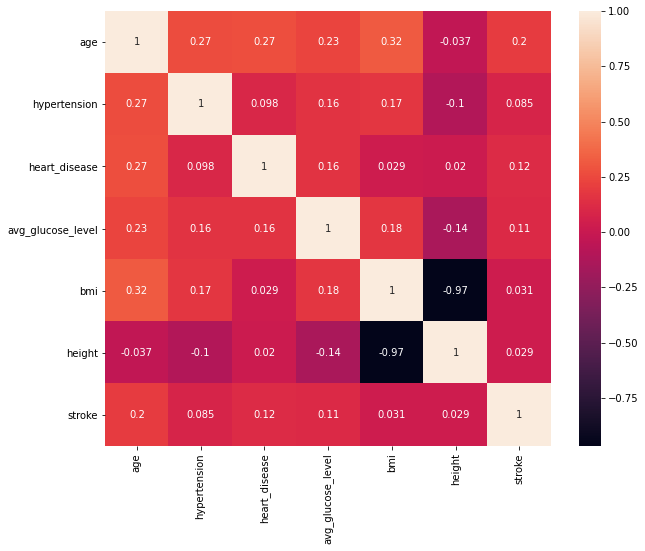

In [4]:
corrMatrix = train.iloc[:, 1:14].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# XỬ LÍ MISSING VALUES
Bằng việc sử dụng các giá trị Mean, Median và hơn nữa xây dựng một model riêng để có thể làm đầy bộ dữ liệu để phục vụ cho 1 model lớn hơn




## Trực quan các missing values

### Tập train

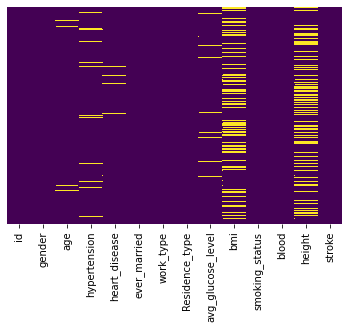

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
train.isnull().sum(axis = 0)

id                      0
gender                  0
age                   107
hypertension          230
heart_disease          90
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level     171
bmi                  1116
smoking_status          0
blood                  10
height               1072
stroke                  0
dtype: int64

### Tập test

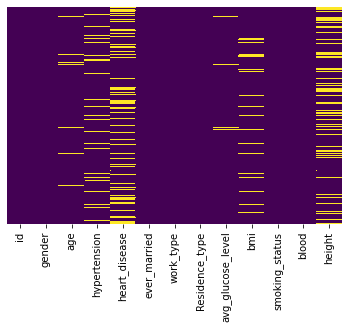

In [7]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
test.isnull().sum(axis = 0)

id                     0
gender                 0
age                   11
hypertension          45
heart_disease        134
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      6
bmi                   43
smoking_status         0
blood                  0
height               124
dtype: int64

## Xử lí cột 'age'

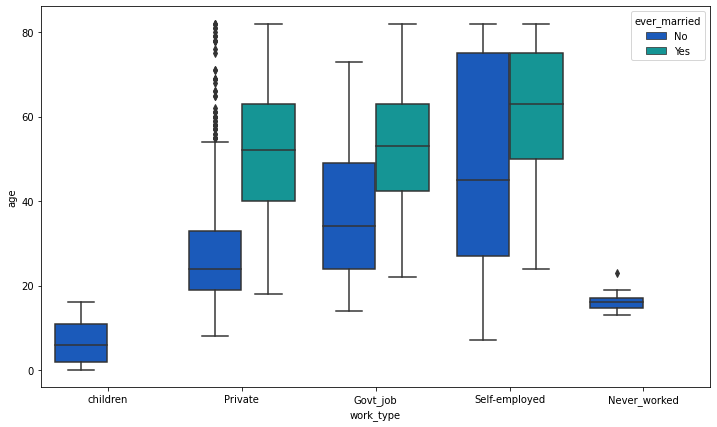

In [9]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='work_type',hue = 'ever_married',y='age',data=train,palette='winter')

**Nhận thấy rằng tình trạng hôn nhân và loại hình công việc có thể tương quan tốt với độ tuổi**

In [10]:
def setAge(data):
  age = data[0]
  ever_married = data[1]
  work_type = data[2]

  if pd.isnull(age):
    if work_type == 'children':
      return 6
    elif work_type == 'Never_worked':
      return 18
    elif work_type == 'Private':
      if ever_married == 'No':
        return 24
      else: return 51
    elif work_type == 'Govt_job':
      if ever_married == 'No':
        return 32
      else: return 51
    else:
      if ever_married == 'No':
        return 45
      else: return 62
  else:
    return age

## Xử lí cột 'heart_disease'

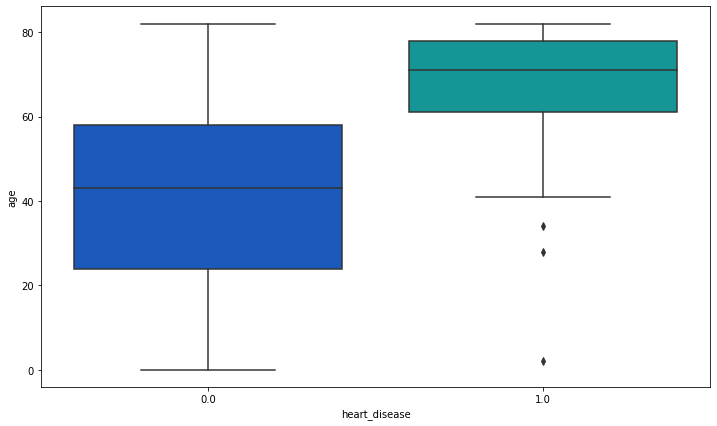

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='heart_disease',y='age',data=train,palette='winter')

**Nhận thấy rằng tuổi càng cao thì tỉ lệ đã từng mắc bệnh tim càng cao**

In [12]:
def setHeart_disease(data):
  heart_disease = data[0]
  age = data[1]

  if pd.isnull(heart_disease):
    if age > 60:
      return 1
    else:
      return 0
  else:
    return heart_disease

## Xử lí cột 'hypertension'



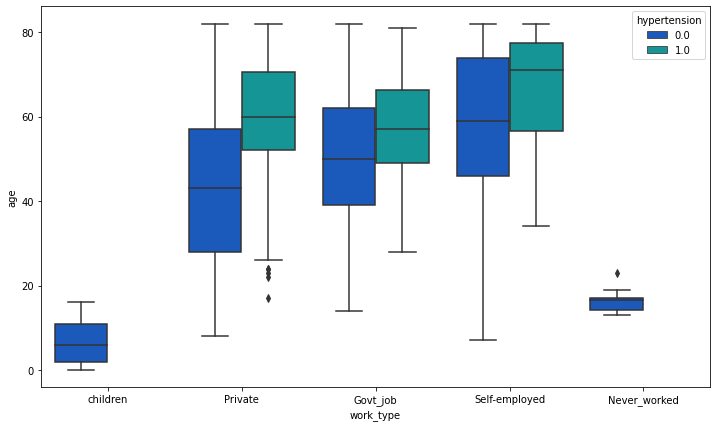

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x= 'work_type',hue = 'hypertension', y='age',data=train,palette='winter')

**Nhận thấy rằng tiền sử mắc bệnh cao huyết áp có thể phụ thuộc ít nhiều vào độ tuổi và loại hình công việc mà họ đang làm**

In [14]:
def setHypertension(data):
  hypertension = data[0]
  age = data[1]
  work_type = data[2]

  if pd.isnull(hypertension):
    if (work_type == 'children' or work_type == 'Never_worked'):
      return 0
    else:
      if age > 55:
        return 1
      else:
        return 0
  else:
    return hypertension

## Xử lí cột 'avg_glucose_level'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


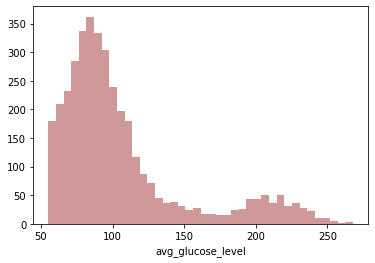

In [15]:
sns.distplot(train['avg_glucose_level'].dropna(),kde=False,color='darkred',bins=40)

In [16]:
train['avg_glucose_level'].value_counts().idxmax()

93.88

In [17]:
round(train['avg_glucose_level'].mean(), 2)

106.18

**Về dữ liệu của cột 'avg_glucose_level' thì suy xét biểu đồ trên, chúng tôi quyết định sẽ gán các giá trị NaN trong cột bằng mean của các giá trị khác.**

**Một phần cũng vì sự tương quan của thuộc tính này với các thuộc tính khác cũng không quá nổi bật.**

In [18]:
avg_mean = train.iloc[:, 8].mean()
def setAvg_glucose_level(data):
  avg = data[0]
  if pd.isnull(avg):
    return avg_mean
  else:
    return avg

## Xử lí cột 'blood'
Do thuộc tính 'blood' của bộ dữ liệu chỉ thiếu 10 giá trị, nên chúng tôi sẽ gán 10 giá trị NaN đó bằng giá trị xuất hiện nhiều nhất để khách quan nhất có thể.

In [19]:
train['blood'].value_counts().idxmax()

'AB'

**Nhóm máu xuất hiện nhiều nhất là AB**

In [20]:
def setBlood(data):
  blood = data[0]
  if pd.isnull(blood):
    return 'AB'
  else:
    return blood

## Xử lí cột 'bmi' và cột 'height'
Vì chúng nó thật sự tương quan mạnh với nhau nên việc dùng model để predict 2 thuộc tính đó lẫn nhau là 1 hướng đi rất hiệu quả

### Xây dựng model bmi <-> height

In [21]:
bmi = train.iloc[:, 9]
height = train.iloc[:, 12]

dataset_height_bmi = pd.concat([height,bmi], axis = 1)
#Bỏ đi tất cả các giá trị NaN trong dataset hiện có để phục vụ cho đọc dữ liệu.
dataset_height_bmi_to_train = dataset_height_bmi.dropna()

**Trực quan hóa dữ liệu**

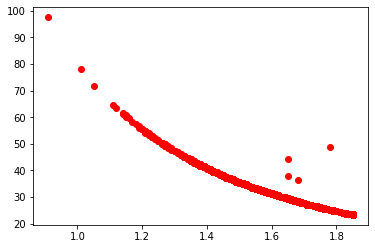

In [22]:
height_train = dataset_height_bmi_to_train.iloc[:, 0].values.reshape(-1,1)
bmi_train = dataset_height_bmi_to_train.iloc[:,-1].values.reshape(-1,1)
plt.scatter(height_train,bmi_train, color = 'red')
plt.show()

**Rõ ràng ta thấy với đồ thị là một đường cong như thế thì Polynomial Linear Regression là một phương án tốt nhất.**

#### Model height -> bmi

In [23]:
poly_transform = PolynomialFeatures(degree=6)
X_poly = poly_transform.fit_transform(height_train)

model_predict_bmi = LinearRegression()
model_predict_bmi.fit(X_poly, bmi_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model bmi -> height

In [24]:
poly_transform = PolynomialFeatures(degree=6)
Y_poly = poly_transform.fit_transform(bmi_train)

model_predict_height = LinearRegression()
model_predict_height.fit(Y_poly, height_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Hàm xử lí dữ liệu 'bmi' và 'height'

In [25]:
# Hai hàm này lát sẽ sài để phục vụ cho code cell ở dưới
def setBmi(data):
  bmi = data[0]
  bmi_mean = train['bmi'].mean()

  if pd.isnull(bmi):
    return bmi_mean
  else:
    return bmi

def setHeight(data):
  height = data[0]
  height_mean = train['height'].mean()

  if pd.isnull(height):
    return height_mean
  else:
    return height

In [26]:
def xu_li_bmi_and_height(df):
  bmi = df.iloc[:, 9]
  height = df.iloc[:, 12]

  dataset_height_bmi = pd.concat([height,bmi], axis = 1)
  #Đầu tiên là predict bmi dựa vào những giá trị chiều cao đã cho trước trong bộ dữ liệu
  dataset_height_bmi_nan = dataset_height_bmi[dataset_height_bmi['bmi'].isnull()]
  dataset_height_bmi_nan = dataset_height_bmi_nan[dataset_height_bmi_nan['height'].notnull()]

  X_ = dataset_height_bmi_nan.iloc[:, 0].values.reshape(-1,1)
  Y_ = dataset_height_bmi_nan.iloc[:, -1]

  poly_transform_a0 = PolynomialFeatures(degree = 6) 
  X_poly_real = poly_transform_a0.fit_transform(X_)
  Y_pred_bmi = model_predict_bmi.predict(X_poly_real)
  #Sau khi predict được bmi, thì điền vào các ô bmi trống với chiều cao tương ứng
  dataset_height_bmi_nan['bmi'] = Y_pred_bmi


  #Tiếp theo là predict height dựa vào những giá trị bmi đã cho trước trong bộ dữ liệu
  dataset_bmi_height_nan = dataset_height_bmi[dataset_height_bmi['height'].isnull()]
  dataset_bmi_height_nan = dataset_bmi_height_nan[dataset_bmi_height_nan['bmi'].notnull()]

  X_ = dataset_bmi_height_nan.iloc[:, -1].values.reshape(-1,1)
  Y_ = dataset_bmi_height_nan.iloc[:, 0]

  poly_transform_a0 = PolynomialFeatures(degree = 6) 
  X_poly_real = poly_transform_a0.fit_transform(X_)
  Y_pred_height = model_predict_height.predict(X_poly_real)
  #Sau khi predict được height, thì điền vào các ô height trống với bmi tương ứng
  dataset_bmi_height_nan['height'] = Y_pred_height


  #Tổng hợp lại
  half_complete_height_bmi = pd.concat([dataset_bmi_height_nan, dataset_height_bmi_nan])
  dataset_notnull = dataset_height_bmi[dataset_height_bmi['height'].notnull()]

  dataset_notnull = dataset_notnull[dataset_notnull['bmi'].notnull()]
  half_complete_height_bmi = pd.concat([half_complete_height_bmi,dataset_notnull])
  half_complete_height_bmi = half_complete_height_bmi.sort_index()
  half_complete_height_bmi = half_complete_height_bmi.round(decimals= 2)

  #Nạp tất cả vào lại dataset
  half_complete_height_bmi.reindex(list(range(half_complete_height_bmi.index.min(),half_complete_height_bmi.index.max()+1)))
  df['bmi'] = half_complete_height_bmi['bmi']
  df['height'] = half_complete_height_bmi['height']

  #Vấn đề bây giờ còn lại là cả hai thuộc tính 'bmi' và 'height' đều NaN
  #Do đó ta sẽ điền các ô đó bằng trung bình của tất cả giá trị nằm trong thuộc tính tương ứng (tất nhiên là điền theo dữ liệu train).
  df['bmi'] = df[['bmi']].apply(setBmi, axis = 1)
  df['height'] = df[['height']].apply(setHeight, axis = 1)

## Gộp tất cả các phương thức trên lại

In [27]:
def Xu_Li(dataset):
  dataset['age'] = dataset[['age', 'ever_married', 'work_type']].apply(setAge, axis = 1)
  dataset['heart_disease'] = dataset[['heart_disease', 'age']].apply(setHeart_disease, axis = 1)
  dataset['hypertension'] = dataset[['hypertension', 'age', 'work_type']].apply(setHypertension, axis = 1)
  dataset['avg_glucose_level'] = dataset[['avg_glucose_level']].apply(setAvg_glucose_level, axis = 1)
  dataset['blood'] = dataset[['blood']].apply(setBlood, axis = 1)
  xu_li_bmi_and_height(dataset)

**HOÀN THÀNH VIỆC XỬ LÍ MISSING VALUES**

# XÂY DỰNG MODEL ĐỂ PREDICT STROKE

In [28]:
Xu_Li(train)
Xu_Li(test)

In [29]:
X_train = train.iloc[:, 1:12].drop('blood', axis = 1)
Y_train = train.iloc[:, 13]
print(X_train)

      gender   age  hypertension  ...  avg_glucose_level        bmi   smoking_status
0     Female   6.0           0.0  ...              85.81  18.600000          Unknown
1       Male  55.0           0.0  ...              89.17  31.650000     never smoked
2     Female  42.0           0.0  ...              98.53  18.500000     never smoked
3     Female  31.0           0.0  ...             108.89  52.300000          Unknown
4     Female  38.0           0.0  ...              91.44  29.463676          Unknown
...      ...   ...           ...  ...                ...        ...              ...
3995    Male  16.0           0.0  ...              99.49  22.000000          Unknown
3996    Male  47.0           0.0  ...              75.30  25.000000  formerly smoked
3997   Other  57.0           1.0  ...             129.54  60.900000           smokes
3998  Female  45.0           0.0  ...             172.33  45.300000  formerly smoked
3999  Female  53.0           1.0  ...              62.55  30.3000

In [30]:
X_test = test.iloc[:, 1:12].drop('blood', axis = 1)

In [31]:
le = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ohe = OneHotEncoder()
def Chuan_Hoa_Du_Lieu(df):
  df['gender']= le.fit_transform(df['gender'])
  df['ever_married']=le.fit_transform(df['ever_married'])
  # df['blood'] = le.fit_transform(df['blood'])


  df['work_type'] = le.fit_transform(df['work_type'])
  df['Residence_type'] = le.fit_transform(df['Residence_type'])
  df['smoking_status'] = le.fit_transform(df['smoking_status'])

  

  cols_to_scale = ['age', 'avg_glucose_level', 'bmi']
  df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
  df['gender'].replace({2:1}, inplace = True)

Chuan_Hoa_Du_Lieu(X_train)
Chuan_Hoa_Du_Lieu(X_test)


In [32]:
print(X_train)

      gender       age  ...       bmi  smoking_status
0          0  0.072266  ...  0.084589               0
1          1  0.670410  ...  0.235805               2
2          0  0.511719  ...  0.083430               2
3          0  0.377441  ...  0.475087               0
4          0  0.462891  ...  0.210471               0
...      ...       ...  ...       ...             ...
3995       1  0.194336  ...  0.123986               0
3996       1  0.572754  ...  0.158749               1
3997       1  0.694824  ...  0.574739               3
3998       0  0.548340  ...  0.393975               1
3999       0  0.645996  ...  0.220162               0

[4000 rows x 10 columns]


In [33]:
!pip install -q -U tensorflow-addons
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

     |████████████████████████████████| 686kB 6.8MB/s 


In [34]:
def ANN(X_train, y_train, X_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(10, input_dim=10, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)    
    return y_preds

In [35]:
from imblearn.over_sampling import SVMSMOTE

svmsmote = SVMSMOTE(random_state = 101)
X_oversample, Y_oversample = svmsmote.fit_resample(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


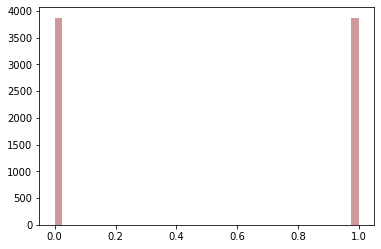

In [36]:
sns.distplot(Y_oversample,kde=False,color='darkred',bins=40)

In [37]:
y_preds = ANN(X_oversample, Y_oversample, X_test, 'binary_crossentropy', -1)

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.5776 - accuracy: 0.7172
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8610
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8677
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2804 - accuracy: 0.8766
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2625 - accuracy: 0.8904
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.8956
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2344 - accuracy: 0.9071
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.9112
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2119 - accuracy: 0.9169
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2070 - accura

# SUBMIT

In [ ]:
import math, requests

def submit_prediction(df, sep=',', comment='', compression='gzip', **kwargs):
    TOKEN='0c33aeb1569058831ee6634cad4065b8e787750eadbb114842af7be413009d77fbf901aeaa3c59dd178856964b27cfe8a6e000743fa95ebdee48f55cc7f7b587'
    URL='http://submission.mmlab.uit.edu.vn/api/submissions'
    df.to_csv('temporary.dat', sep=sep, compression=compression, **kwargs)
    r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': open('temporary.dat', 'rb')},data={'comment':comment, 'compression': compression})
    if r.status_code == 429:
        raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
    if r.status_code != 200:
        raise Exception(r.text)
        
submit_prediction(df_submission, sep=',', index=True, comment='my submission')